# Cardiotocography analysis of fetal patterns with a view to identifying problems 

## import libraries

In [1]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

## Load dataset

In [2]:
path = 'D:/datasets/CTG.xls'
raw_data = pd.read_excel(path,sheet_name=1,header=1)
print(raw_data)

           b       e   AC     FM    UC    DL   DS   DP   DR  Unnamed: 9  ...  \
0      240.0   357.0  0.0    0.0   0.0   0.0  0.0  0.0  0.0         NaN  ...   
1        5.0   632.0  4.0    0.0   4.0   2.0  0.0  0.0  0.0         NaN  ...   
2      177.0   779.0  2.0    0.0   5.0   2.0  0.0  0.0  0.0         NaN  ...   
3      411.0  1192.0  2.0    0.0   6.0   2.0  0.0  0.0  0.0         NaN  ...   
4      533.0  1147.0  4.0    0.0   5.0   0.0  0.0  0.0  0.0         NaN  ...   
...      ...     ...  ...    ...   ...   ...  ...  ...  ...         ...  ...   
2124  1576.0  3049.0  1.0    0.0   9.0   0.0  0.0  0.0  0.0         NaN  ...   
2125  2796.0  3415.0  1.0    1.0   5.0   0.0  0.0  0.0  0.0         NaN  ...   
2126     NaN     NaN  NaN    NaN   NaN   NaN  NaN  NaN  NaN         NaN  ...   
2127     NaN     NaN  NaN    NaN   NaN   0.0  0.0  0.0  0.0         NaN  ...   
2128     NaN     NaN  NaN  564.0  23.0  16.0  1.0  4.0  0.0         NaN  ...   

         E     AD     DE     LD    FS  

## Drop Columns 

In [3]:
keep_name_list = ['LB','AC','FM','UC','DL','DS','DP','ASTV','MSTV','ALTV','MLTV','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','Tendency','NSP']
data = raw_data[keep_name_list]
print(data.describe(include = 'all'))

print('Data length before dropping NAN',len(data))
data = data.dropna()
print('Data length after dropping NAN',len(data))


                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2127.000000  2127.000000  2128.000000   
mean    133.303857     2.722484     7.503056     3.669017     1.576128   
std       9.840844     3.560850    39.030452     2.877148     2.517794   
min     106.000000     0.000000     0.000000     0.000000     0.000000   
25%     126.000000     0.000000     0.000000     1.000000     0.000000   
50%     133.000000     1.000000     0.000000     3.000000     0.000000   
75%     140.000000     4.000000     2.000000     5.000000     3.000000   
max     160.000000    26.000000   564.000000    23.000000    16.000000   

                DS           DP         ASTV         MSTV         ALTV  ...  \
count  2128.000000  2128.000000  2127.000000  2127.000000  2127.000000  ...   
mean      0.003759     0.127820    47.008933     1.335449     9.884814  ...   
std       0.061213     0.471687    17.210648     0.891543    18.476534  ...   
min       0.00000

## Transform Columns 

In [4]:
nominal_class_names = ['NSP','Tendency']
for col in data:
  if col in nominal_class_names:
    continue
  data[col]=(data[col]-data[col].mean())/data[col].std()
  
print(data.describe(include = 'all'))



                 LB            AC           FM            UC            DL  \
count  2.126000e+03  2.126000e+03  2126.000000  2.126000e+03  2.126000e+03   
mean   1.096228e-15  5.347452e-17     0.000000 -8.021179e-17 -8.021179e-17   
std    1.000000e+00  1.000000e+00     1.000000  1.000000e+00  1.000000e+00   
min   -2.774544e+00 -7.645600e-01    -0.195050 -1.285495e+00 -6.282277e-01   
25%   -7.421982e-01 -7.645600e-01    -0.195050 -9.342597e-01 -6.282277e-01   
50%   -3.087713e-02 -4.837282e-01    -0.195050 -2.317889e-01 -6.282277e-01   
75%    6.804440e-01  3.587673e-01    -0.141179  4.706819e-01  5.721426e-01   
max    2.712790e+00  6.537067e+00    14.996743  6.792919e+00  5.773747e+00   

                 DS            DP          ASTV          MSTV          ALTV  \
count  2.126000e+03  2.126000e+03  2.126000e+03  2.126000e+03  2.126000e+03   
mean   4.344805e-17  4.010589e-17 -8.689610e-17  6.684315e-17 -2.673726e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+0

## Split, Generate Folds, Train, and Evaluate Models

In [5]:
classifier_df =pd.DataFrame({'Classifier_name':[],'Accuracy':[]})
classifier_arr = []
predictions_arr = []

remainder,test = model_selection.train_test_split(data,test_size=0.2)
splitter = model_selection.KFold(shuffle=True,n_splits=30)
for i, (train_index, val_index) in enumerate(splitter.split(remainder)):
  
  if i < 10:
    classifier_name = 'Decision_Tree'
    classifier = DecisionTreeClassifier(criterion='gini', 
                                                   splitter='best',
                                                   max_depth=None, 
                                                   min_samples_split=2, 
                                                   min_samples_leaf=1, 
                                                   min_weight_fraction_leaf=0.0,
                                                   max_features=None, 
                                                   random_state=i*66566//10, 
                                                   max_leaf_nodes=None, 
                                                   min_impurity_decrease=0.0, 
                                                   class_weight=None, 
                                                   ccp_alpha=0.0)
  elif i < 20:
    classifier_name = 'Logistic_Regression'
    classifier = LogisticRegression(penalty='l2', 
                                   dual=False, 
                                   tol=0.0001, 
                                   C=1.0, 
                                   fit_intercept=True, 
                                   intercept_scaling=1, 
                                   class_weight=None, 
                                   random_state=i*66566//10, 
                                   solver='lbfgs', 
                                   max_iter=10000, 
                                   multi_class='auto', 
                                   verbose=0, 
                                   warm_start=False, 
                                   n_jobs=None, 
                                   l1_ratio=None)  
  else:
    classifier_name = 'Naive_Bayes'
    classifier = GaussianNB(priors=None, 
                            var_smoothing=1e-09)
  
  train_set_X = data.iloc[train_index][data.columns[~data.columns.isin(['NSP'])]]
  train_set_y = data.iloc[train_index]['NSP']
  val_set_X = data.iloc[val_index][data.columns[~data.columns.isin(['NSP'])]]
  val_set_y = data.iloc[val_index]['NSP']
  
  classifier.fit(train_set_X,train_set_y)
  classifier_arr.append([classifier_name,classifier])
  
  predictions = classifier.predict(train_set_X)
  predictions_arr.append(pd.DataFrame({'Actual':train_set_y,'Prediction':predictions}))
  
  accuracy = classifier.score(val_set_X,val_set_y)
  classifier_df = pd.concat([classifier_df,pd.DataFrame({'Classifier_name':classifier_name,'Accuracy':accuracy},index=[i])],axis=0)


## Plot Histogram of Accuracy by Classifier

Decision_Tree
Logistic_Regression
Naive_Bayes


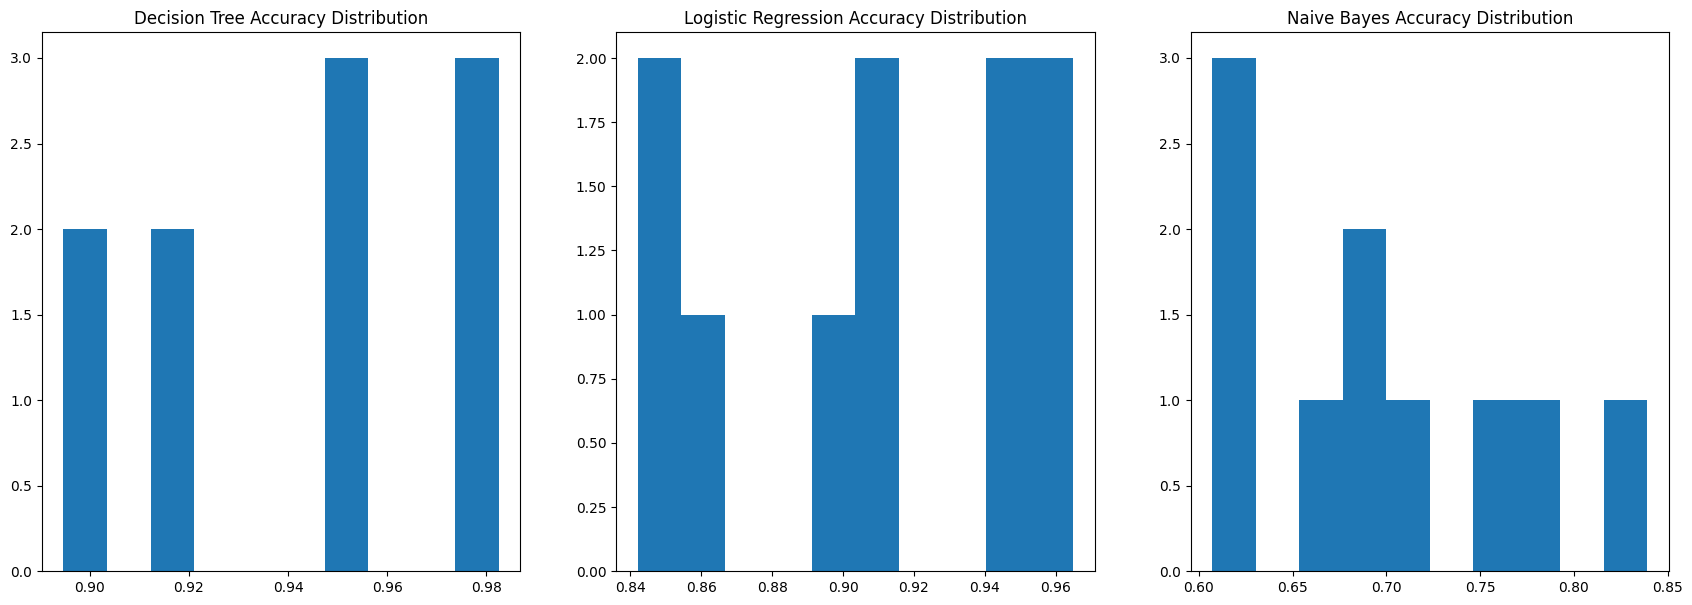

In [6]:
classifier_groups = classifier_df.groupby('Classifier_name')
count=0
plt.figure(figsize=(21,7))
for i,group in classifier_groups:
  print(i)
  count+=1
  plt.subplot(1,3,count)
  plt.title(i.replace('_',' ')+' Accuracy Distribution')
  plt.hist(group['Accuracy'])
plt.show()

## Plot Boxplot of Accuracy by Classifier

Decision_Tree
Logistic_Regression
Naive_Bayes


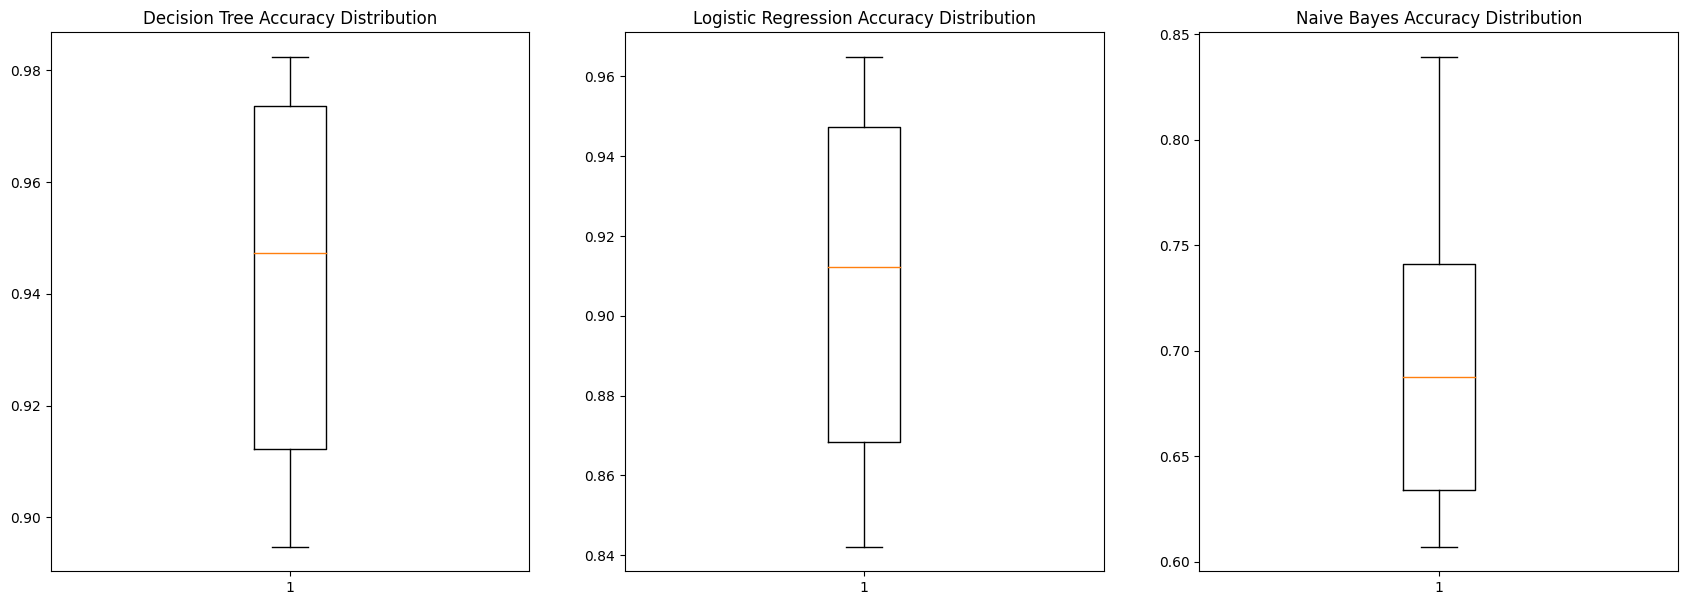

In [7]:
count=0
plt.figure(figsize=(21,7))
for i,group in classifier_groups:
  print(i)
  count+=1
  plt.subplot(1,3,count)
  plt.title(i.replace('_',' ')+' Accuracy Distribution')
  plt.boxplot(group['Accuracy'])#change linespace to be same across all boxplots
plt.show()

The decision tree classifier has similar IQR variance to the logistic regression model. Both are much more stable than the Naive Bayes model, but it's hard to tell which model performs better. Let's try another test. 

## Compare validation accuracies on folds
  ### Then choose highest validation accuracy to test on test fold

In [9]:
best_classifier_indecies = {}
for i,group in classifier_groups:
  best_group_ind = group[['Accuracy']].idxmax()
  best_classifier_indecies[i] = list(best_group_ind)[0]
  
final_decision_tree = classifier_arr[best_classifier_indecies['Decision_Tree']][1]
final_logistic_regressor = classifier_arr[best_classifier_indecies['Logistic_Regression']][1]

test_set_X = test[data.columns[~data.columns.isin(['NSP'])]]
test_set_y = test['NSP']

for name,classifier in [['final_decision_tree',final_decision_tree],['final_logistic_regressor',final_logistic_regressor]]:
  test_accuracy = classifier.score(test_set_X,test_set_y)
  print(f'{name} test accuracy: ',test_accuracy)

final_decision_tree test accuracy:  0.931924882629108
final_logistic_regressor test accuracy:  0.8779342723004695


## Summary

Because the decision tree classifier was the most stable across many folds and performed the best on the test set, we can safely say the decision tree classifier gives the best results out of these 3 classifiers.